<a href="https://colab.research.google.com/github/yagipong/Ensemble-Trees/blob/main/Ensemble_Trees_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/CD_DS/2_Machine_Learning/Week_2/Assignments/Core/Boston_Housing_from_Sklearn.csv'
df = pd.read_csv(path)
df.head()

,CRIM,NOX,RM,AGE,PTRATIO,LSTAT,PRICE
0,0.00632,0.538,6.575,65.2,15.3,4.98,24.0
1,0.02731,0.469,6.421,78.9,17.8,9.14,21.6
2,0.02729,0.469,7.185,61.1,17.8,4.03,34.7
3,0.03237,0.458,6.998,45.8,18.7,2.94,33.4
4,0.06905,0.458,7.147,54.2,18.7,5.33,36.2


In [ ]:
X = df.drop(columns = ['CRIM', 'NOX', 'AGE', 'PRICE'])
y = df['PRICE']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

#Decision Tree

In [ ]:
dec_tree = DecisionTreeRegressor(random_state= 42)
dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
train_preds = dec_tree.predict(X_train)
test_preds = dec_tree.predict(X_test)

In [ ]:
train_score = dec_tree.score(X_train, y_train)
test_score = dec_tree.score(X_test, y_test)

print(train_score)
print(test_score)

1.0
0.4526070862755007


In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
dec_tree.get_depth()

20

In [ ]:
dec_tree.get_n_leaves()

368

In [ ]:
depths = list(range(2, 40))

scores = pd.DataFrame(index = depths, columns = ['Test Score', 'Train Score'])

for depth in depths:
  dec_tree = DecisionTreeRegressor(max_depth= depth, random_state= 42)
  dec_tree.fit(X_train, y_train)
  train_score = dec_tree.score(X_train, y_train)
  test_score = dec_tree.score(X_test, y_test)
  scores.loc[depth, 'Train Score'] = train_score
  scores.loc[depth, 'Test Score'] = test_score

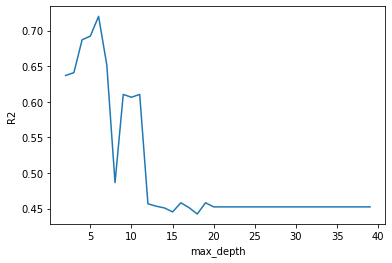

In [ ]:
plt.plot(depths, scores['Test Score'])
plt.xlabel('max_depth')
plt.ylabel('R2');

In [ ]:
sorted_scores = scores.sort_values(by='Test Score', ascending = False)
sorted_scores.head()

,Test Score,Train Score
6,0.720032,0.921483
5,0.692269,0.891318
4,0.68715,0.856741
7,0.651788,0.945706
3,0.641014,0.807697


In [ ]:
dec_tree_6 = DecisionTreeRegressor(max_depth = 6, random_state = 42)
dec_tree_6.fit(X_train, y_train)
train_6_score = dec_tree_6.score(X_train, y_train)
test_6_score = dec_tree_6.score(X_test, y_test)

print(train_6_score)
print(test_6_score)

0.9214827076541541
0.7200322619567403


#Bagged Tree

In [ ]:
bagreg = BaggingRegressor(random_state = 42)

In [ ]:
bagreg.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
bagreg.fit(X_train, y_train)

BaggingRegressor(random_state=42)

In [ ]:
bagreg.predict(X_test)

array([22.52, 31.02, 18.14, 23.9 , 15.36, 21.42, 20.42, 13.29, 21.32,
       21.63, 21.8 , 17.69, 11.62, 21.42, 17.49, 27.76, 20.98,  8.85,
       48.46, 15.96, 23.33, 23.29, 12.59, 23.6 , 14.82, 14.69, 29.52,
       15.85, 19.39, 20.68, 19.87, 22.83, 29.45, 20.41, 11.5 , 17.66,
       34.56, 29.42, 18.27, 23.53, 17.87, 28.08, 48.46, 23.51, 25.32,
       13.98, 16.03, 23.04, 15.34, 29.22, 22.56, 35.91, 18.86, 25.95,
       42.  , 21.44, 14.73, 30.04, 24.33, 19.85, 26.81, 35.22, 28.25,
       19.51, 25.13, 19.62, 15.4 , 23.07, 25.96, 22.38, 20.36, 26.12,
       10.13, 21.79, 21.26,  8.03, 21.54, 49.54, 12.94, 11.96, 23.58,
        8.34, 30.13,  8.84, 20.45, 26.37, 13.47, 23.45, 23.35, 16.84,
       22.15,  7.9 , 19.79, 20.92, 38.25, 19.51, 21.94, 10.19, 15.27,
       13.31, 19.51, 25.61, 12.  , 26.44, 18.96, 11.67, 19.35, 26.02,
       18.18, 23.25,  6.16, 13.  , 22.34, 21.98, 34.87, 14.49, 42.32,
       15.6 , 17.75, 24.05, 23.55, 24.45,  9.17, 20.82, 23.22, 19.44,
       24.36])

In [ ]:
bagreg_train_score = bagreg.score(X_train, y_train)
bagreg_test_score = bagreg.score(X_test, y_test)

print(bagreg_train_score)
print(bagreg_test_score)

0.9589474812896627
0.6810228787398808


In [ ]:
estimators = [10, 20, 30, 40, 50, 100]
scores = pd.DataFrame(index = estimators, columns = ['Train Score', 'Test Score'])

for num_estimators in estimators:
  bag_reg = BaggingRegressor(n_estimators= num_estimators, random_state = 42)
  bag_reg.fit(X_train, y_train)
  train_score = bag_reg.score(X_train, y_train)
  test_score = bag_reg.score(X_test, y_test)
  scores.loc[num_estimators, 'Train Score'] = train_score
  scores.loc[num_estimators, 'Test Score'] = test_score

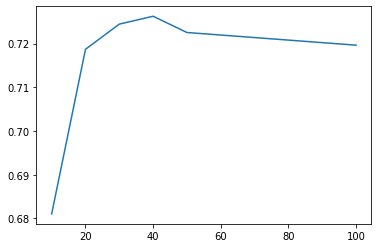

In [ ]:
plt.plot(scores['Test Score'])
plt.show()

In [ ]:
scores = scores.sort_values(by ='Test Score', ascending = False)
scores

,Train Score,Test Score
40,0.97047,0.726255
30,0.96873,0.724454
50,0.970968,0.722536
100,0.973254,0.719636
20,0.96859,0.718694
10,0.958947,0.681023


In [ ]:
best_n_estimators = scores.index[0]
bag_reg_tuned = BaggingRegressor(n_estimators=best_n_estimators, random_state = 42)
bag_reg_tuned.fit(X_train, y_train)

print(bag_reg_tuned.score(X_train, y_train))
print(bag_reg_tuned.score(X_test, y_test))

0.9704701836712523
0.7262552442342756


#Random Forest

In [ ]:
rf = RandomForestRegressor(random_state = 42)
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
rf.predict(X_test)

array([22.219, 31.851, 17.69 , 24.189, 14.647, 20.756, 19.719, 12.907,
       21.452, 21.719, 19.915, 19.218, 12.467, 21.029, 17.591, 25.501,
       20.927,  8.507, 47.621, 15.667, 23.822, 23.375, 12.003, 22.383,
       14.924, 15.505, 30.201, 15.621, 20.092, 20.822, 18.988, 23.251,
       27.037, 20.978, 11.55 , 17.275, 35.818, 22.98 , 19.644, 23.389,
       18.256, 28.057, 46.257, 23.27 , 24.541, 15.265, 16.068, 23.248,
       14.938, 29.483, 23.002, 35.318, 18.85 , 26.457, 44.175, 20.827,
       14.759, 32.364, 22.971, 20.536, 26.187, 34.437, 30.741, 19.252,
       27.195, 18.911, 15.161, 23.3  , 26.385, 20.66 , 21.089, 26.597,
       10.559, 23.233, 21.56 ,  7.754, 20.829, 48.825, 12.774, 11.453,
       23.502,  8.045, 30.079,  8.865, 21.233, 26.43 , 14.145, 23.257,
       23.57 , 17.255, 21.463,  7.923, 19.149, 20.948, 28.907, 19.033,
       23.   , 11.469, 15.128, 12.923, 20.682, 29.342, 11.327, 22.534,
       20.946, 11.626, 17.924, 25.366, 20.643, 23.57 ,  7.108, 13.181,
      

In [ ]:
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)

print(rf_train_score)
print(rf_test_score)

0.9728543493496158
0.7185553579730205


In [ ]:
est_depths = [estimator.get_depth() for estimator in rf.estimators_]
max(est_depths)

22

In [ ]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns = ['Test Score'])
for depth in depths:
  model = RandomForestRegressor(max_depth = depth)
  model.fit(X_train, y_train)
  scores.loc[depth, 'Train Score'] = model.score(X_train, y_train)
  scores.loc[depth, 'Test Score'] = model.score(X_test, y_test)
  scores.head()

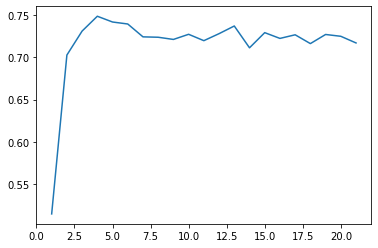

In [ ]:
plt.plot(scores['Test Score']);

In [ ]:
sorted_scores = scores.sort_values(by = 'Test Score', ascending = False)
sorted_scores.head()

,Test Score,Train Score
4,0.748664,0.887728
5,0.741845,0.913276
6,0.739493,0.934154
13,0.737122,0.972182
3,0.731124,0.848869


In [ ]:
n_ests = [50, 100, 150, 200, 250]
scores2 = pd.DataFrame(index = n_ests, columns = ['Test Score', 'Train Score'])
for n in n_ests:
  model = RandomForestRegressor(max_depth = 29, n_estimators = n)
  model.fit(X_train, y_train)
  scores2.loc[n, 'Train Score'] = model.score(X_train, y_train)
  scores2.loc[n, 'Test Score'] = model.score(X_test, y_test)
scores2.head()

,Test Score,Train Score
50,0.710179,0.973848
100,0.724942,0.971723
150,0.71951,0.972592
200,0.725312,0.972395
250,0.725949,0.972538


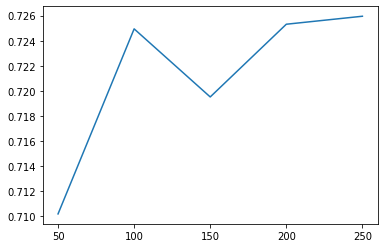

In [ ]:
plt.plot(scores2['Test Score'])
plt.xticks(n_ests);

In [ ]:
sorted_scores2 = scores2.sort_values(by = 'Test Score', ascending = False)
sorted_scores2.head()

,Test Score,Train Score
250,0.725949,0.972538
200,0.725312,0.972395
100,0.724942,0.971723
150,0.71951,0.972592
50,0.710179,0.973848


##Decision Tree:

Train Score = 0.9214827076541541

Test Score = 0.7200322619567403

##Bagged Trees:

Train Score = 0.9704701836712523

Test Score = 0.7262552442342756

##random forest:

Train Score = 0.972538

Test Score = 0.725949

Bagged trees is the best model because it's a better fit that the decision tree model and also the margin between the train score and the test score is smaller than the margin on random forests.